# Common instructions

- Aim to attempt all the mandatory questions (marked with a *) in the problem set. 


- Only attempt optional question after you have attempted all the mandatory questions. 


- More credit will be given if you have successfully attempted all the mandatory questions, even if you do not attempt a single optional question, as opposed to missing even one mandatory question while attempting all the optional questions.


- With the above caveat, attempt as many questions as possible within the time period. Partially attempted questions will get partial credit.


- Normally, you should work through the problem set in ascending order (Q1 -> Q4).


- Clean, labeled plots and clear data interpretation will boost your score. So too, will the use of functions, meaningful variable names, and readable code.


- You have a maximum of 2 days to work on the assignment. We will not consider assignments submitted after the deadline. You are free to search the internet, but are not to discuss with others in any way or form, in pain of immediate disqualification.


- Report the websites used to obtain help. Before the deadline, create a single .zip file with all your code submit it in the submission link provided to you in the email. DO NOT include data in your zip file. 


- You can use any programming language of your choice to solve all or part of the questions, preferably notebooks like Jupyter Notebook, Google Colab etc. We should be able to execute your program(s) to generate the required data and plots.


- In case you are unable to complete some parts, clearly indicate how would you go about the task ? What steps would you try etc.


# Input data

- The TSV file `SampleData.tsv` has the following columns

    - <b>Sample</b>: Sample IDs (S01, S02, S03...)
    - <b>Treatment</b>: Information on sample type 
    
        - <i>HF+</i>: Blood plasma samples collected from coronary disease patients post major surgery who had a heart failure within 3 years of surgery
        - <i>HF-</i>: Blood plasma samples collected from coronary disease patients post major surgery who recovered post surgery without heart failure
        - <i>HVOL</i>: Blood plasma samples collected from individuals without any discernable coronary disease
        
        
    
- The gzipped file `GSE208194_RawTPM.csv.gz` contains gene expression information for the sample mentioned in `SampleData.tsv` where the file structure looks like

ENSEMBL ID        |S01      |S02      |S03      |S04
:-----------------|:--------|:--------|:--------|:--------
ENSG00000000419.12|2.398878 |12.157726|1.40211  |7.667875
ENSG00000000938.13|3.324077 |13.971038|1.917631 |10.225812
ENSG00000001629.10|12.037059|1.453811 |12.596614|15.799738
ENSG00000001631.15|1.287932 |5.842868 |1.412257 |1.526812

Where each row is a feature/gene (n=4150) and each column is a sample where the features are measured.


# Feature filter*

- Remove genes/features with very low expression values (< 1) in 70% of samples (even if they are good features they cannot be used for diagnositics)
- Remove a member of feature pairs which are highly correlated
- Provide the statistics with respect to the removals

In [74]:
# Place your code here
import numpy as np
import pandas as pd

sample_path = 'SampleData.tsv'
dfSample = pd.read_table(sample_path,index_col=0)

In [75]:
genome_path = './GSE208194_RawTPM.csv'
df = pd.read_csv(genome_path,index_col=0)

In [76]:
df.columns

Index(['S01', 'S02', 'S03', 'S04', 'S05', 'S06', 'S07', 'S08', 'S09', 'S10',
       'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S20',
       'S21', 'S22', 'S23', 'S24', 'S26', 'S27', 'S28', 'S29', 'S30', 'S31',
       'S32', 'S33', 'S34', 'S35', 'S36', 'S37', 'S38', 'S39', 'S40', 'S41',
       'S42', 'S44', 'S45', 'S46', 'S47', 'S48', 'S49', 'S50', 'S51', 'S52',
       'S53', 'S54', 'S55', 'S56', 'S57', 'S58', 'S59', 'S60', 'S61', 'S62',
       'S63', 'S64', 'S65', 'S66', 'S67', 'S68', 'S69', 'S70', 'S71', 'S72',
       'S73', 'S74', 'S75', 'S77', 'S78', 'S79', 'S80', 'S81', 'S82', 'S83',
       'S84', 'S85', 'S86', 'S87', 'S88', 'S89', 'S90', 'S95', 'S96'],
      dtype='object')

In [77]:
for i in range(len(df)):
    curr_count=0
    for j in range(len(df.iloc[i])):
        if df.iloc[i,j]<1.0:
            curr_count+=1
    if curr_count/89 >0.7:
        print('True')
        df.drop(index=i)

In [78]:
print(df.shape) #No features removed as no feature has more than 70% values less than 1.0

(4150, 89)


In [79]:
df = df.transpose()

#Calculating Correlation Matrix
corr = df.corr().abs()

upper = corr.where(np.triu(np.ones(corr.shape),k=1).astype(bool))

drop_cols = [col for col in upper.columns if any(upper[col]>0.95)]
df.drop(drop_cols,axis=1,inplace=True)


In [80]:
df.shape # 164 features were dropped as they were highly related to another feature

(89, 3986)

1. We can see that we did not find any feature which has more than 70% of its value measured as less than 70%
2. Total of 164 pairs of features where found to be highly correlated. So these were dropped, leaving us with 3986 features.

# Feature elimination*

From the feature matrix `GSE208194_RawTPM.csv.gz`, split the samples into training and test and on the training set 
- using recursive feature elimination identify the optimal number of features out of the 4150, which can predict the status of a particular individual to be 
    - Having the likelihood of coronary disease which can lead to heart failure (HF+)
    - Having the likelihood of coronary disease which may not lead to heart failure (HF-)
    - Healthy indiviual (HVOL)
    
- Show the relative accuracy of the model as different number of features are used as a plot.

In [81]:
# Place your code here
#Attempting to find Proper number of features for a moel using SVC
from sklearn.svm import SVC 


#df = df.transpose() Uncomment for the first try

df_merged=df.merge(dfSample,how='inner',left_index=True,right_index=True)
df_merged_train = df[]

In [154]:
X = df_merged.drop(['treatment'],axis=1)
from sklearn.model_selection import train_test_split
y = df_merged['treatment']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

# X_train = X[0:75]
# X_test = X[75:]

# y_train = y[0:75]
# y_test = y[75:]

# visualizer = RFECV(SVC(kernel='linear',C=1))
# visualizer.fit(X,y)
# visualizer.show()



In [155]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=SVC(kernel='linear',C=1))

history = rfe.fit(X_train,y_train)

In [156]:
print(X_train.columns[rfe.support_])

Index(['ENSG00000000938.13', 'ENSG00000001629.10', 'ENSG00000002549.12',
       'ENSG00000002586.20', 'ENSG00000002834.18', 'ENSG00000003056.8',
       'ENSG00000003402.20', 'ENSG00000003436.16', 'ENSG00000003756.17',
       'ENSG00000004534.15',
       ...
       'ENSG00000282885.2', 'ENSG00000283633.1', 'ENSG00000283907.1',
       'ENSG00000284809.1', 'ENSG00000285884.1', 'ENSG00000286021.2',
       'ENSG00000286171.1', 'ENSG00000286522.1', 'ENSG00000287080.1',
       'ENSG00000287825.1'],
      dtype='object', length=1993)


In [157]:
from sklearn.feature_selection  import RFECV

rfecv = RFECV(estimator=SVC(kernel='linear',C=1),min_features_to_select=50,step=1,n_jobs = -1,cv=5)
rfecv.fit(X_train,y_train)



RFECV(cv=5, estimator=SVC(C=1, kernel='linear'), min_features_to_select=50,
      n_jobs=-1)

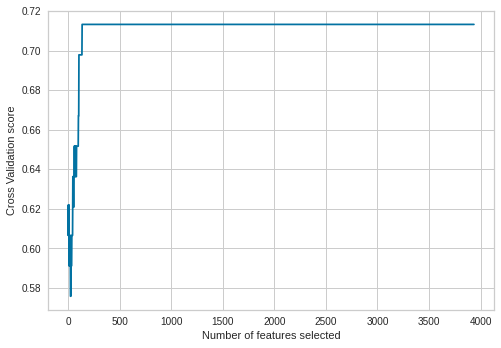

In [158]:
# print(X_train.columns[rfecv.support_])
import matplotlib.pyplot as plt

plt.plot(range(3937),rfecv.cv_results_['mean_test_score'])
plt.xlabel("Number of features selected")
plt.ylabel("Cross Validation score")
plt.show()

In [159]:
print(X_train.columns[rfecv.support_])
print('Number of optimal features are',len(X_train.columns[rfecv.support_]))


Index(['ENSG00000002586.20', 'ENSG00000005249.13', 'ENSG00000005961.19',
       'ENSG00000008952.17', 'ENSG00000008988.9', 'ENSG00000019582.15',
       'ENSG00000034510.6', 'ENSG00000035403.17', 'ENSG00000049245.13',
       'ENSG00000059758.8',
       ...
       'ENSG00000254584.2', 'ENSG00000259001.3', 'ENSG00000266412.5',
       'ENSG00000268163.1', 'ENSG00000270103.3', 'ENSG00000271503.6',
       'ENSG00000274383.1', 'ENSG00000278677.1', 'ENSG00000278828.1',
       'ENSG00000283907.1'],
      dtype='object', length=185)
Number of optimal features are 185


# Model building*

With N optimal features identified, used a feature selection method of choice to select the top N features and build a multi-class classifier with cross-validation and report its accuracy and any other metric deemed suitable.


In [190]:
# Place your code here
#Using the features selected by the rfecv method above to be used in an SVC classifier
from sklearn.model_selection import cross_validate

X_train_NFeatures = X_train[X_train.columns[rfecv.support_]]
X_test_NFeatures = X_test[X_train.columns[rfecv.support_]]

svc = SVC(C=5,kernel='rbf')
cv_results = cross_validate(svc,X_train_NFeatures,y_train,cv=5,scoring=['balanced_accuracy','f1_macro'],return_train_score=True,return_estimator=True)
#svc.fit(X_train_NFeatures,y_train)

In [191]:
cv_results

{'fit_time': array([0.00358462, 0.0018146 , 0.00157857, 0.0018611 , 0.00160527]),
 'score_time': array([0.00320196, 0.00184107, 0.0020864 , 0.00184608, 0.00188112]),
 'estimator': [SVC(C=5), SVC(C=5), SVC(C=5), SVC(C=5), SVC(C=5)],
 'test_balanced_accuracy': array([0.7       , 0.6       , 0.7       , 0.75      , 0.83333333]),
 'train_balanced_accuracy': array([0.84074074, 0.81944444, 0.79259259, 0.83157895, 0.75672515]),
 'test_f1_macro': array([0.7       , 0.54545455, 0.67936508, 0.74603175, 0.82222222]),
 'train_f1_macro': array([0.83735745, 0.8179198 , 0.79174122, 0.83308943, 0.75351377])}

# Model evaluation*

- Apply the model on the test set and report the accuracy and per class sensitivity i.e the total number of samples in a given class within the test set, and how many were predicted accurately.
- Also report as a binary matrix how many samples were correctly identified as HF+/HF- and HVOL

|    |      HF+/-      |  HVOL |
|----------|:-------------:|------:|
| HF+/- |  17 | 0 |
| HVOL |    0   | 6 |

The above is the matrix where we consider HF+ and HF- to be the same

In [166]:
# # Place your code here
# from sklearn.metrics import classification_report

# y_pred_train = svc.predict(X_train_NFeatures)
# print("On training dataset")
# print(classification_report(y_train,y_pred_train))

# y_pred_test = svc.predict(X_test_NFeatures)
# print("On testing dataset")
# print(classification_report(y_test,y_pred_test))

On training dataset
              precision    recall  f1-score   support

         HF+       0.75      0.47      0.58        19
         HF-       0.70      0.83      0.76        23
        HVOL       0.89      1.00      0.94        24

    accuracy                           0.79        66
   macro avg       0.78      0.77      0.76        66
weighted avg       0.78      0.79      0.77        66

On testing dataset
              precision    recall  f1-score   support

         HF+       0.50      0.30      0.37        10
         HF-       0.36      0.57      0.44         7
        HVOL       1.00      1.00      1.00         6

    accuracy                           0.57        23
   macro avg       0.62      0.62      0.61        23
weighted avg       0.59      0.57      0.56        23



In [170]:
temp = zip(y_test,y_pred_test)

for i,j in temp:
    print(i,j)

HF+ HF-
HF+ HF+
HF+ HF-
HF- HF-
HF+ HF+
HF- HF+
HVOL HVOL
HF- HF+
HF- HF-
HF- HF+
HF- HF-
HF+ HF-
HF+ HF-
HVOL HVOL
HVOL HVOL
HF+ HF-
HVOL HVOL
HVOL HVOL
HVOL HVOL
HF+ HF-
HF- HF-
HF+ HF+
HF+ HF-


# Biological significance of features

- Take the top 5 features and search for their gene names in [Gene Cards](https://www.genecards.org/) with using the suffix for example:
  ENSG00000000419.12 -> ENSG00000000419	
  
- Take the gene names identified and search in [Pubmed](https://pubmed.ncbi.nlm.nih.gov/) as 
  "Gene name" AND "coronary disease"
  
- Report if anything of interest is found by reading the abstract of the top hits in pubmed.